<a href="https://colab.research.google.com/github/pathakchiranjit/Face_Recognition_CV/blob/main/1006_GCDAI_Capstone_CV_ipyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Capstone Group Project (GCDAI) - **Consulting Assignments**

<img src="https://github.com/pathakchiranjit/Face_Recognition_CV/blob/main/Snaps/1.png?raw=true" align='left'><br/>



The client for this project is the Administration Department at **AutoBox** having over a thousand employees.

They want to maintain a **central database** of all of their employees.
And, extra emphasis is on **increasing security** and ease of operation.
The idea is to create a **web-based app for Facial Recognition** in order to have rightful entry to the office premises and restrict any trespassers.
Once the employees are identified on a daily basis, they can have a simple entry and exit procedure without any manual intervention.They want to deal with their existing employee’s database and those coming in as a new recruit.

**Current Practice:**

The existing employees or the ones joining the Company gets a card having a QR(RFID) code with unique identification for entry and exit.

**The current practice suffers from the following problems:**

- This approach is too haphazard. The quality of **insight gained is misaligned** due to misleading data.
- The second problem is these **insights can't be aggregated** to frame certain policies on this.
- The third problem is the **security breach of the Company**, which can hamper the situation very badly.

As a part of the **digital approach**, the Admin Department hires **INSAIDians** as their **AI consultant** in order to supplement their security protocols with a more proactive approach.

<img src="https://github.com/pathakchiranjit/Face_Recognition_CV/blob/main/Snaps/2.png?raw=true" align='left'><br/>

### **Weekly Goals for the team?**:
The AI consultant team will follow the below week-wise goals,

<img src="https://github.com/pathakchiranjit/Face_Recognition_CV/blob/main/Snaps/3.png?raw=true" align='left'><br/>



## Table of Contents

1. [Objective: Problem Statement](#section1)<br>
2. [Tools : Importing Packages, Libraries & Defining Functions:](#section2)<br>
  - 2.1 [Import Packages and Libraries:](#section201)<br>
  - 2.2 [Defining Functions :](#section202)<br>
    - 2.2.1 [big_bbox : To find bigger bounding box as title face for an image having multiple faces.](#section2021)<br>
    - 2.2.2 [extract_face : Pipe line containing image preprocessing steps as convert to 'RGB' --> detect faces --> identify bigger bounding box as target face --> extract the face --> crop to required dimension for embedding model.](#section2022)<br>
    - 2.2.3 [load_faces : extract faces for images in a folder](#section2023)<br>
    - 2.2.4 [load_dataset : extract faces for images of all the sub-folder in a directory and add label the image as per the sub-folder name](#section2024)<br>
    - 2.2.5 [get_embeddig : using a face embedding model and saved extracted faces the faces are being embedded](#section2025)<br>
    - 2.2.6 [load_faces_test : preprocess all the unseen/test images provided in a folder and returns the extracted faces, its embeddings and the name of the file](#section2026)<br>
    - 2.2.7 [proba : it will define whether final prediction is being 'Permitted' or 'Restricted' based on class probability threshold](#section2027)<br>
3. [Collecting & Loading Data](#section3)<br>
  - 3.1 [ Import train & validation dataset from G-Drive:](#section301)<br>
  - 3.2 [ Import unseen / test dataset from G-Drive:](#section302)<br>
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Basic preprocessing: conversion to RGB and extraction of faces](#section401)<br>
  - 4.2 [Prepare Train and validation data set](#section402)<br>
  - 4.3 [Create Face Embeddings for Train and validation dataset](#section403)<br>
  - 4.4 [Perform Face Classification:](#section404)<br>
  - 4.5 [Random Checks for dataset:](#section405)<br>
5. [Prediction on Unseen data / Test data:](#section5)<br>
  - 5.1 [Preprocessing Pipeline: conversion to RGB, extraction of faces and get embeddings](#section501)<br>
  - 5.2 [Prediction with probability estimation using trained model](#section502)<br>
  - 5.3 [Prepare the submission file](#section503)<br>
6. [Conclusion](#section6)<br>
7. [Actionable Insights:](#section7)
8. [Limitation of the study:](#section8)

<a id=section1></a>
## 1. Problem Statement





<img src="https://github.com/pathakchiranjit/Face_Recognition_CV/blob/main/Snaps/4.PNG?raw=true" align='left'><br/>

<a id=section2></a>
## 2. Tools : Importing Packages, Libraries & Defining Functions:





### 2.1 Import Packages and Libraries:

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns                                      
%matplotlib inline
sns.set()
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50 
import warnings
warnings.filterwarnings('ignore')
from subprocess import check_output

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [ ]:
import itertools

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
!pip install mtcnn

     |████████████████████████████████| 2.3 MB 12.9 MB/s 


In [ ]:
import mtcnn
print(mtcnn.__version__)

0.1.0


In [ ]:
# face detection for the Celebrity Faces Dataset
from os import listdir
import os, os.path
import math
from os.path import isdir
from PIL import Image
from matplotlib import pyplot
from numpy import savez_compressed
from numpy import asarray
from mtcnn.mtcnn import MTCNN

In [ ]:
# calculate a face embedding for each face in the dataset using facenet
from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed
from tensorflow.keras.models import load_model

In [ ]:
# develop a classifier for the Celebrity Faces Dataset
from random import choice
from numpy import load
from numpy import expand_dims
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot

In [ ]:
import tensorflow_hub as hub
from tensorflow.keras import models

### 2.2 Defining Functions :

### 2.2.1 big_bbox : To find bigger bounding box as title face for an image having multiple faces.

In [ ]:
def big_bbox(data):
    biggest=0
    if data !=[]:
      for faces in data:
        box=faces['box']            
        # calculate the area in the image
        area = box[3]  * box[2]
        if area>biggest:
          biggest=area
          bbox=box
      return bbox
    else:
      return (None)

### 2.2.2 extract_face : Pipe line containing image preprocessing steps as convert to 'RGB' --> detect faces --> identify bigger bounding box as target face --> extract the face --> crop to required dimension for embedding model.

In [ ]:
# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = asarray(image)
	# create the detector, using default weights
	detector = MTCNN()   
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = big_bbox(results)
	# bug fix
	x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

### 2.2.3 load_faces : extract faces for images in a folder

In [ ]:
# load images and extract faces for all images in a directory
def load_faces(directory):
	faces = list()
	# enumerate files
	for filename in listdir(directory):
		# path
		path = directory + filename
		# get face
		face = extract_face(path)
		# store
		faces.append(face)
	return faces

### 2.2.4 load_dataset : extract faces for images of all the sub-folder in a directory and add label the image as per the sub-folder name

In [ ]:
# load a dataset that contains one subdir for each class that in turn contains images
def load_dataset(directory):
	X, y = list(), list()
	# enumerate folders, on per class
	for subdir in listdir(directory):
		# path
		path = directory + subdir + '/'
		# skip any files that might be in the dir
		if not os.path.isdir(path):
			continue
		# load all faces in the subdirectory
		faces = load_faces(path)
		# create labels
		labels = [subdir for _ in range(len(faces))]
		# summarize progress
		print('>loaded %d examples for class: %s' % (len(faces), subdir))
		# store
		X.extend(faces)
		y.extend(labels)
	return asarray(X), asarray(y)

### 2.2.5 get_embeddig : using a face embedding model and saved extracted faces the faces are being embedded

In [ ]:
# get the face embedding for one face
def get_embedding(model, face_pixels):
	# scale pixel values
	face_pixels = face_pixels.astype('float32')
	# standardize pixel values across channels (global)
	mean, std = face_pixels.mean(), face_pixels.std()
	face_pixels = (face_pixels - mean) / std
	# transform face into one sample
	samples = expand_dims(face_pixels, axis=0)
	# make prediction to get embedding
	yhat = model.predict(samples)
	return yhat[0]

### 2.2.6 load_faces_test : preprocess all the unseen/test images provided in a folder and returns the extracted faces, its embeddings and the name of the file

In [ ]:
# load images and extract faces for all images in a directory
def load_faces_test(directory,model):
	faces = list()
	embed = list()
	names = list()
  # enumerate files
	for filename in listdir(directory):
		# path
		path = directory + filename
		# get face
		face = extract_face(path)
    # embed face
		embedding = get_embedding(model,face)
		# store
		faces.append(face)
		embed.append(embedding)
		names.append(filename)
	return faces,embed,names

### 2.2.7 proba : it will define whether final prediction is being 'Permitted' or 'Restricted' based on class probability threshold  

In [ ]:
def proba (df):
    if df['Proba'] > 99.999:
        val = df['Name']
    else:
        val = 'Unidentified'
    return val

<a id=section3></a>
## 3. Collection & Loading data:





### 3.1  Import train & validation dataset from G-Drive:

In [ ]:
!unzip "/content/gdrive/MyDrive/GCDAI_Capstone_CV_Project/data_with_own.zip" 

### 3.2  Import unseen / test dataset from G-Drive:

In [ ]:
!unzip "/content/gdrive/MyDrive/GCDAI_Capstone_CV_Project/test.zip" 

<a id=section4></a>
## 4. Data Pre-processing:





### 4.1 Basic preprocessing: conversion to RGB and extraction of faces 

1 (160, 160, 3)
2 (160, 160, 3)
3 (160, 160, 3)
4 (160, 160, 3)
5 (160, 160, 3)
6 (160, 160, 3)
7 (160, 160, 3)
8 (160, 160, 3)
9 (160, 160, 3)
10 (160, 160, 3)
11 (160, 160, 3)
12 (160, 160, 3)
13 (160, 160, 3)
14 (160, 160, 3)


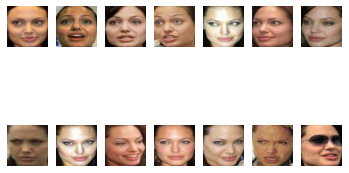

In [ ]:
# specify folder to plot
folder = "/content/data_with_own/train/Angelina_Jolie/"
max = len(os.listdir(folder))
m = 7
n = int(math.ceil(max / m))
i = 1
# enumerate files
for filename in listdir(folder):
	# path
	path = folder + filename
	# get face
	face = extract_face(path)
	print(i, face.shape)
  
  # plot
	pyplot.subplot(n, m, i)
	pyplot.axis('off')
	pyplot.imshow(face)
	i += 1
pyplot.show()

**Observation:**
Face extraction are acceptable and cropping for desired dimension is also ok.



### 4.2 Prepare Train and validation data set 

In [23]:
# load train dataset
trainX, trainy = load_dataset('/content/data_with_own/train/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('/content/data_with_own/val/')
# save arrays to one file in compressed format
savez_compressed('celebrity-faces-dataset.npz', trainX, trainy, testX, testy)
print(testX.shape, testy.shape)

>loaded 36 examples for class: George_W_Bush
>loaded 18 examples for class: Winona_Ryder
>loaded 39 examples for class: Serena_Williams
>loaded 36 examples for class: Arnold_Schwarzenegger
>loaded 38 examples for class: Vladimir_Putin
>loaded 17 examples for class: Tiger_Woods
>loaded 12 examples for class: Michael_Schumacher
>loaded 16 examples for class: Naomi_Watts
>loaded 23 examples for class: Bill_Clinton
>loaded 25 examples for class: David_Beckham
>loaded 12 examples for class: Chiranjit_Pathak
>loaded 15 examples for class: Jennifer_Lopez
>loaded 14 examples for class: Angelina_Jolie
>loaded 18 examples for class: Atal_Bihari_Vajpayee
>loaded 15 examples for class: Jennifer_Aniston
>loaded 11 examples for class: Bill_Gates
(345, 160, 160, 3) (345,)
>loaded 5 examples for class: George_W_Bush
>loaded 5 examples for class: Winona_Ryder
>loaded 5 examples for class: Serena_Williams
>loaded 5 examples for class: Arnold_Schwarzenegger
>loaded 5 examples for class: Vladimir_Putin
>l

**Observation:**

<img src="https://github.com/pathakchiranjit/Face_Recognition_CV/blob/main/Snaps/5.PNG?raw=true" align='left'><br/>

### 4.3 Create Face Embeddings for Train and validation dataset



In [24]:
# load the face dataset
data = load('celebrity-faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)
# load the facenet model
model_fcnt = load_model('/content/gdrive/MyDrive/GCDAI_Capstone_CV_Project/pretrained_models_facenet/facenet_keras.h5',custom_objects={'KerasLayer': hub.KerasLayer})
model_fcnt.compile()
print('Loaded Model')
# convert each face in the train set to an embedding
newTrainX = list()
for face_pixels in trainX:
	embedding = get_embedding(model_fcnt, face_pixels)
	newTrainX.append(embedding)
newTrainX = asarray(newTrainX)
print(newTrainX.shape)
# convert each face in the test set to an embedding
newTestX = list()
for face_pixels in testX:
	embedding = get_embedding(model_fcnt, face_pixels)
	newTestX.append(embedding)
newTestX = asarray(newTestX)
print(newTestX.shape)
# save arrays to one file in compressed format
savez_compressed('celebrity-faces-embeddings.npz', newTrainX, trainy, newTestX, testy)

Loaded:  (345, 160, 160, 3) (345,) (81, 160, 160, 3) (81,)
Loaded Model
(345, 128)
(81, 128)


### 4.4 Perform Face Classification:

In [ ]:
# load dataset
data = load('celebrity-faces-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
model_class = SVC(kernel='linear', probability=True)
model_class.fit(trainX, trainy)
# predict
yhat_train = model_class.predict(trainX)
yhat_test = model_class.predict(testX)
# score
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

### 4.5 Random Checks for dataset:

Predicted: Atal_Bihari_Vajpayee (56.152)
Expected: Atal_Bihari_Vajpayee


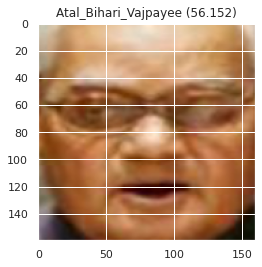

In [26]:
# test model on a random example from the test dataset
data = load('celebrity-faces-dataset.npz')
testX_faces = data['arr_2']
#selection = choice([i for i in range(testX.shape[0])])
selection = 70
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])
# prediction for the face
samples = expand_dims(random_face_emb, axis=0)
yhat_class = model_class.predict(samples)
yhat_prob = model_class.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])
# plot for fun
pyplot.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
pyplot.title(title)
pyplot.show()

Predicted: Bill_Clinton (61.017)
Expected: Bill_Clinton


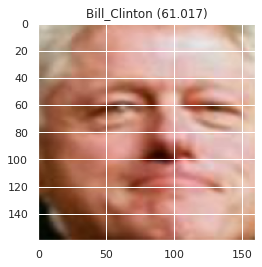

Predicted: Bill_Clinton (66.500)
Expected: Bill_Clinton


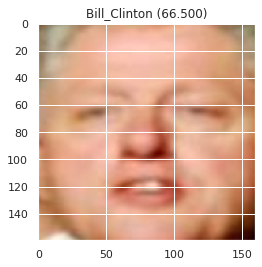

Predicted: Bill_Clinton (68.696)
Expected: Bill_Clinton


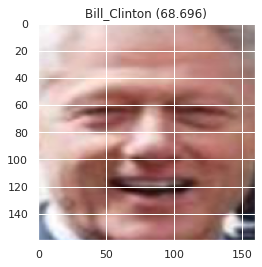

Predicted: Bill_Clinton (64.186)
Expected: Bill_Clinton


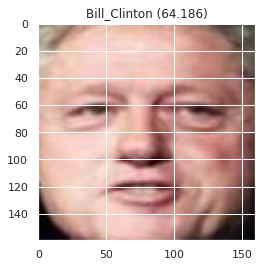

Predicted: Bill_Clinton (57.108)
Expected: Bill_Clinton


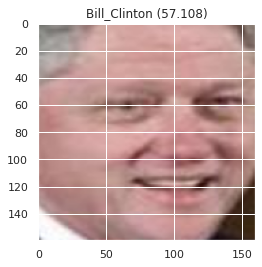

Predicted: David_Beckham (68.127)
Expected: David_Beckham


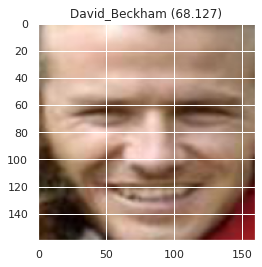

In [27]:
m1 = 40
m2 = 46

# enumerate files
for selection in range(m1,m2,1):
    random_face_pixels = testX_faces[selection]
    random_face_emb = testX[selection]
    random_face_class = testy[selection]
    random_face_name = out_encoder.inverse_transform([random_face_class])
    # prediction for the face
    samples = expand_dims(random_face_emb, axis=0)
    yhat_class = model_class.predict(samples)
    yhat_prob = model_class.predict_proba(samples)
    # get name
    class_index = yhat_class[0]
    class_probability = yhat_prob[0,class_index] * 100
    predict_names = out_encoder.inverse_transform(yhat_class)
    print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
    print('Expected: %s' % random_face_name[0])
    # plot for fun
    pyplot.imshow(random_face_pixels)
    title = '%s (%.3f)' % (predict_names[0], class_probability)
    pyplot.title(title)
    pyplot.show()

<a id=section4></a>
## 5. Prediction on Unseen data / Test data:





### 5.1 Preprocessing Pipeline: conversion to RGB, extraction of faces and get embeddings 

In [28]:
# load unknown dataset + preprocess + embedding
TestX_faces,TestX_embds,TestX_names = asarray(load_faces_test('/content/gdrive/MyDrive/GCDAI_Capstone_CV_Project/test/',model_fcnt))

**Observation:**

<img src="https://github.com/pathakchiranjit/Face_Recognition_CV/blob/main/Snaps/6.PNG?raw=true" align='left'><br/>

### 5.2 Prediction with probability estimation using trained model 

In [ ]:
test_data_dict={}
for selection in range(TestX_embds.shape[0]):
    random_face_pixels = TestX_faces[selection]
    random_face_emb = TestX_embds[selection]
    file = TestX_names[selection]
    # prediction for the face
    samples = expand_dims(random_face_emb, axis=0)
    yhat_class = model_class.predict(samples)
    yhat_prob = model_class.predict_proba(samples)
    # get name
    class_index = yhat_class[0]
    class_probability = yhat_prob[0,class_index] * 100
    predict_names = out_encoder.inverse_transform(yhat_class)
    # Creating a dictionary
    test_data_dict[file]=[predict_names,class_probability]
    print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
    #print('Expected: %s' % random_face_name[0])
    # plot for fun
    pyplot.imshow(random_face_pixels)
    title = '%s  %s (%.3f)' % (TestX_names[selection],predict_names[0], class_probability)
    pyplot.title(title)
    pyplot.show()

### 5.3 Prepare the submission file 

In [ ]:
prediction = pd.DataFrame.from_dict(test_data_dict).T.reset_index()
prediction.columns =['File_Name','Name','Proba']
prediction

In [ ]:
prediction.dtypes

In [ ]:
prediction = prediction.astype({"File_Name": str, "Name": str, "Proba": float})

In [33]:
prediction.dtypes

File_Name    object 
Name         object 
Proba        float64
dtype: object

In [34]:
prediction['File_Name'] = prediction['File_Name'].apply(lambda x: x.replace('.jpg',''))
prediction['Name'] = prediction['Name'].apply(lambda x: x.replace('[',"").replace(']',"")).str.strip(" ' ' ")
prediction['Prediction'] = prediction.apply(proba, axis =1)
prediction.drop(['Name', 'Proba'], axis =1, inplace=True)

In [35]:
prediction = prediction.astype({"File_Name": int, "Prediction": str})

In [36]:
prediction.sort_values(by=['File_Name'], ascending=True, inplace = True)
prediction

,File_Name,Prediction
7,1,Angelina_Jolie
17,2,Arnold_Schwarzenegger
13,3,Atal_Bihari_Vajpayee
21,4,Bill_Clinton
18,5,Bill_Gates
11,6,Unidentified
5,7,David_Beckham
4,8,George_W_Bush
9,9,Unidentified
1,10,Unidentified


In [37]:
prediction.to_csv('test_predictions.csv',index = False, header= False)

In [38]:
from google.colab import files
files.download("test_predictions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<a id=section7></a>
## 6. Conclusion:





- Model for **face recognition** for **authorize personnel** has been built well with their **images**.

- The basic preprocessing steps like **color channel conversion to RGB** followed by **MTCNN** techniques have been adopted in order to **extract faces**.

- Pre-trained **Facenet** model used for **Face Embedding**.

- **Support Vector classifier (linear)** seems to be performed well.

- The model can be **deployed to the company server** and is used to **grant access** to personnel to **enter or exit** the company premises.

- A **photo is captured** of each arriving personnel using **a live-cam** and is analyzed by the model.

- If the **model recognizes** the person, they are **Permitted** access to enter the premises. Else, the entry is **Restricted** until any human interference.


<a id=section7></a>
## 7. Actionable Insights:





- The model **unable to identify** **two images** in the test dataset, which are **actually present during training** and the reason can be attributed as **age of the person in the image**. **One with younger age and other with elder age** of the person in the images are unable to identify by the model.

- The model is to be **retrained from time to time** to account for **the changes to people’s faces** due to **aging**, and whenever **new personnel joins** the company.


<a id=section8></a>
## 8. Limitation of the study:





- The study has been **carried out over some of the celebrity dataset** and  **some of the pre-trained models for image**. Hence, with **other available models** and **dataset** the **model performance might be different**.


<img src="https://github.com/pathakchiranjit/Face_Recognition_CV/blob/main/Snaps/7.PNG?raw=true" align='left'><br/>